In [1]:
import torch
from torch import nn
import d2l

#### 1.读取数据

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

#### 2.初始化模型参数

In [3]:
input_num, hidden_num, output_num = 784, 256, 10
W1 = nn.Parameter(torch.randn(input_num, hidden_num, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(hidden_num, requires_grad=True))
W2 = nn.Parameter(torch.randn(hidden_num, output_num, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(output_num, requires_grad=True))
params = [W1, b1, W2, b2]

#### 3.定义激活函数

In [4]:
def relu(X):
    return torch.max(X, torch.zeros_like(X))

#### 4.定义模型

In [5]:
def net(X):
    X = X.reshape((-1, input_num))
    X = torch.matmul(X, W1) + b1
    X = relu(X)
    return torch.matmul(X, W2) + b2

#### 5.交叉熵损失函数

In [6]:
loss = nn.CrossEntropyLoss(reduction='none')

#### 6.训练模型

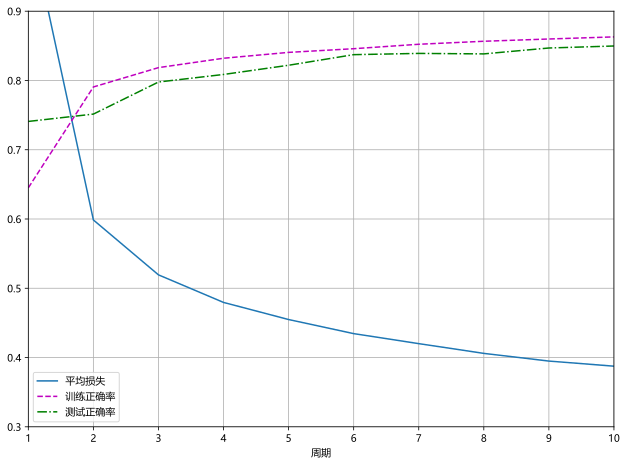

In [7]:
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

#### 7.测试模型

In [ ]:
d2l.predict_ch3(net, test_iter, n=14)